In [12]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from scipy.stats import randint

# Đọc dữ liệu từ file CSV (giả sử có cột 'X' và 'Y')
data = pd.read_csv("bang so lieu dien thoai.csv")  # Thay "data.csv" bằng tên file của bạn
df = pd.DataFrame(data, columns=['RAM', 'MEMORY', 'PIN', 'PRICE'])
print(df)

# Chuẩn bị dữ liệu cho mô hình hồi quy
X = df.drop(['PRICE'], axis = 1)  # Định dạng DataFrame
y = df['PRICE']  # Định dạng Series

    RAM  MEMORY   PIN     PRICE
0     1      16  3000   1850000
1     3      32  4000   2650000
2     4      64  5000   3350000
3     3      32  3300   3790000
4     3      32  5000   4250000
5     6     128  5000   4700000
6     4      64  4000   4150000
7     6     128  5000   5150000
8     8     128  4500   6600000
9     8     256  5000  10100000
10    8     128  4500  10500000
11    8     128  4100  12400000
12    8     256  4500  13650000
13    8     128  4500  12790000
14    8     128  4500  15500000
15   12     128  5000  16000000
16   12     256  4500  18990000
17    8     256  3300  19350000
18    8     256  3300  20990000
19    8     256  4800  23000000
20   12     256  4500  23000000
21   12     256  5000  29800000
22   12     512  5000  29990000
23   12     512  4400  33990000


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor()
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 11),
}
rf_grid = RandomizedSearchCV(rf, rf_params, n_iter=100, cv=5, scoring='neg_mean_squared_error', random_state=42)
rf_grid.fit(X_train, y_train)  # Fit the RandomizedSearchCV for Random Forest

# Dự đoán với mô hình tốt nhất (Random Forest Regression)
best_model = rf_grid.best_estimator_
best_model.fit(X_train, y_train)
best_pred = best_model.predict(X_test)  
accuracy_rf = rf_grid.best_estimator_.score(X_test, y_test)
print(f"ACCURACY: {accuracy_rf:.2f}")
# Dự đoán với mô hình tốt nhất trên một mẫu mới
new_phone = np.array([[4, 64, 4000]])   
predicted_price = best_model.predict(new_phone)
print(f"Giá dự đoán cho mẫu mới: {predicted_price[0]:.2f}")

ACCURACY: 0.66
Giá dự đoán cho mẫu mới: 4042600.00


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gb = GradientBoostingRegressor()
gb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 11),
}
gb_grid = RandomizedSearchCV(gb, gb_params, n_iter=100, cv=5, scoring='neg_mean_squared_error', random_state=42)
gb_grid.fit(X_train, y_train)  # Fit the RandomizedSearchCV for Gradient Boosting

# Dự đoán với mô hình tốt nhất (Gradient Boosting Regression)
best_model_gb = gb_grid.best_estimator_
best_model_gb.fit(X_train, y_train)
best_pred = best_model_gb.predict(X_test) 
accuracy_gb = gb_grid.best_estimator_.score(X_test, y_test)
print(f"ACCURACY: {accuracy_gb:.2f}")
# Dự đoán với mô hình tốt nhất trên một mẫu mới
new_phone = np.array([[4, 64, 4000]])
predicted_price = best_model_gb.predict(new_phone)
print(f"Giá dự đoán cho mẫu mới: {predicted_price[0]:.2f}")

ACCURACY: 0.72
Giá dự đoán cho mẫu mới: 4019754.21


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Huấn luyện mô hình hồi quy tuyến tính
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Lấy các hệ số của phương trình hồi quy
coefficients = linear_model.coef_
intercept = linear_model.intercept_

# In phương trình hồi quy
print("Phương trình hồi quy tuyến tính:")
print(f"PRICE = {intercept:.2f} + {coefficients[0]:.2f} * RAM + {coefficients[1]:.2f} * MEMORY + {coefficients[2]:.2f} * PIN")

Phương trình hồi quy tuyến tính:
PRICE = 4666101.34 + 1758007.34 * RAM + 32463.24 * MEMORY + -2238.31 * PIN


Dữ liệu ban đầu:
    RAM  MEMORY   PIN    PRICE
0    1      16  3000  1850000
1    3      32  4000  2650000
2    4      64  5000  3350000
3    3      32  3300  3790000
4    3      32  5000  4250000

Dữ liệu sau khi giảm chiều:
 [[2998.11865596 -107.4078894 ]
 [3997.93295105 -132.52465327]
 [4998.4033118  -141.6755182 ]
 [3298.52581984 -103.72904933]
 [4997.08599563 -173.66123032]]

MSE (Sai số bình phương trung bình) sau khi giảm chiều: 5409409186472.8203


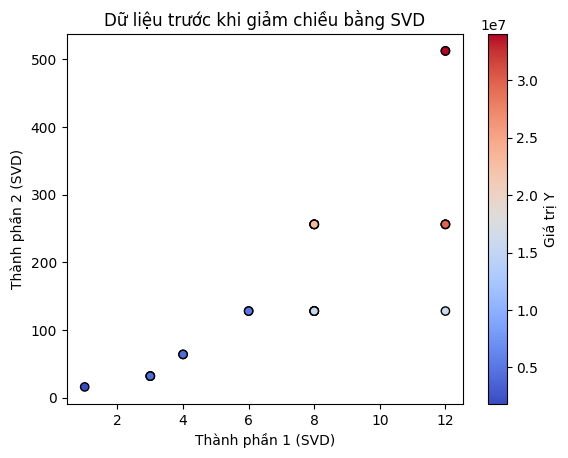

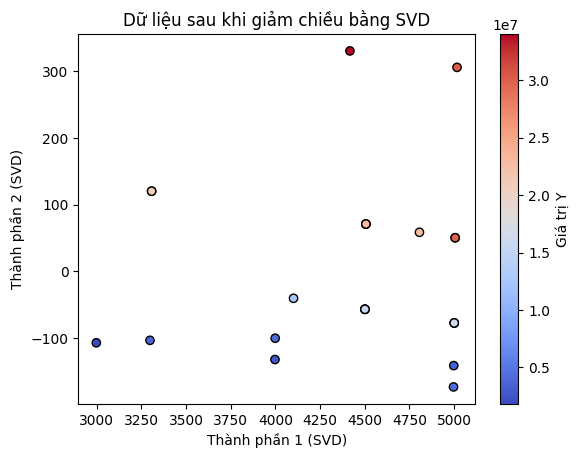

In [17]:
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LinearRegression

# 1. Đọc dữ liệu từ file CSV
data = pd.read_csv("bang so lieu dien thoai.csv")  # Thay bằng đường dẫn file của bạn
print("Dữ liệu ban đầu:\n", data.head())

# 2. Tách biến độc lập (X) và biến mục tiêu (y)
# 2. Tách biến độc lập (X) và biến mục tiêu (y)
X = data.iloc[:, :-1]  # Chọn tất cả cột trừ cột cuối cùng
y = data.iloc[:, -1]   # Cột cuối cùng là biến mục tiêu  

# 3. Áp dụng SVD để giảm chiều dữ liệu
svd = TruncatedSVD(n_components=2)  # Giảm dữ liệu về 2 chiều
X_reduced = svd.fit_transform(X)

print("\nDữ liệu sau khi giảm chiều:\n", X_reduced[:5])  # Hiển thị 5 dòng đầu

# 4. Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# 5. Huấn luyện mô hình hồi quy tuyến tính trên dữ liệu đã giảm chiều
model = LinearRegression()
model.fit(X_train, y_train)

# 6. Dự đoán và đánh giá mô hình
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"\nMSE (Sai số bình phương trung bình) sau khi giảm chiều: {mse:.4f}")

# Trực quan hóa dữ liệu trước khi giảm chiều
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.colorbar(label="Giá trị Y")
plt.xlabel("Thành phần 1 (SVD)")
plt.ylabel("Thành phần 2 (SVD)")
plt.title("Dữ liệu trước khi giảm chiều bằng SVD")
plt.show()

# 7. Trực quan hóa dữ liệu sau khi giảm chiều
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.colorbar(label="Giá trị Y")
plt.xlabel("Thành phần 1 (SVD)")
plt.ylabel("Thành phần 2 (SVD)")
plt.title("Dữ liệu sau khi giảm chiều bằng SVD")
plt.show()


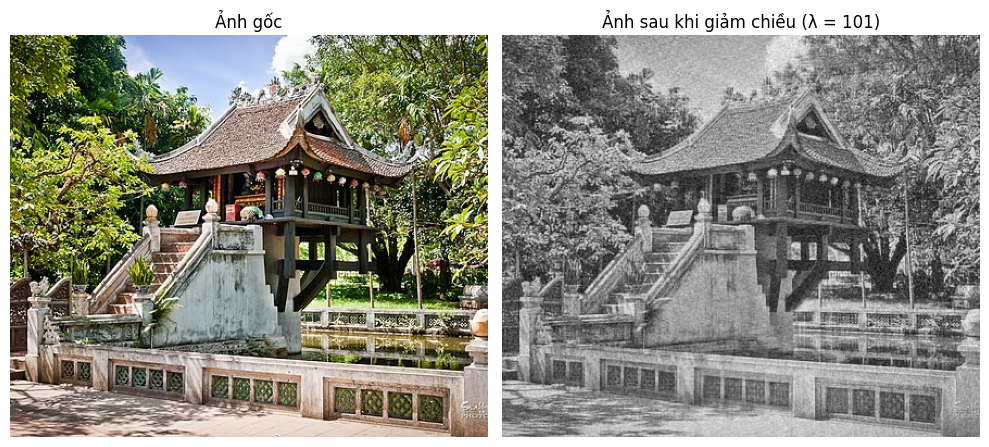

Lượng thông tin giữ lại: 97.10624694824219%
[[ 45.9999    13.839333 100.02191  ... 184.48325   54.336876  32.05237 ]
 [ 38.109444  47.12648   72.88286  ... 205.6331    88.989746  41.99416 ]
 [ 70.82016   93.40504   50.95007  ... 107.37441  -10.306358   7.004905]
 ...
 [183.4095   199.86382  195.86172  ... 112.27054  125.411575 124.80187 ]
 [175.7249   173.96587  191.47264  ... 126.78038  122.667175 136.71007 ]
 [162.66525  149.81148  168.50249  ... 111.85076  114.581764 137.24202 ]]


In [1]:
def nen_anh(ten_file_anh, so_lambda):
    from scipy.linalg import svd
    import urllib.request
    import numpy as np
    import matplotlib.pyplot as plt
    from PIL import Image

    response = urllib.request.urlopen(ten_file_anh)
    original_image = Image.open(response)
    gray_image = original_image.convert('L')
    ma_tran_A = np.array(gray_image)
    ma_tran_U, Sigma, ma_tran_VT = svd(ma_tran_A)
    ma_tran_Sk = np.diag(Sigma[:so_lambda])
    r = np.count_nonzero(np.diag(Sigma))
    ma_tran_Uk = ma_tran_U[:, :so_lambda]
    ma_tran_VTk = ma_tran_VT[:so_lambda, :]
    sum = np.sum(Sigma[:so_lambda]**2) / np.sum(Sigma[:r]**2)
    luong_thong_tin = sum * 100

    anh_da_nen = ma_tran_Uk @ ma_tran_Sk @ ma_tran_VTk
    gray_scale_array = np.array(anh_da_nen)

    # Hiển thị ảnh gốc và ảnh sau khi giảm chiều
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(original_image, cmap='gray')
    plt.title("Ảnh gốc")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(anh_da_nen, cmap='gray')
    plt.title(f"Ảnh sau khi giảm chiều (λ = {so_lambda})")
    plt.axis('off')

    plt.tight_layout()
    plt.show()
    return gray_scale_array, luong_thong_tin

gray_scale_array, luong_thong_tin = nen_anh("https://drive.usercontent.google.com/u/0/uc?id=1sSqWQxG9UTZupoBgmiyLIoYXoN7vrRu6&export=download", 101)
print(f"Lượng thông tin giữ lại: {luong_thong_tin}%")
print(gray_scale_array)

In [1]:
def predict_by_svd(new_ram, new_memory, new_pin):
    from scipy.linalg import svd
    import pandas as pd
    import numpy as np

    df = pd.read_csv("bang so lieu dien thoai.csv")
    A = np.column_stack((df[['RAM', 'MEMORY', 'PIN']], np.ones(df.shape[0])))
    Y = df['PRICE']
    At_A = A.T @ A
    det_At_A = np.linalg.det(At_A)
    if det_At_A != 0:
        w = np.linalg.inv(At_A) @ A.T @ Y
    else:
        U, Sigma, Vt = svd(At_A)
        Sigma_inv = np.linalg.inv(np.diag(Sigma))
        w = Vt.T @ Sigma_inv @ U.T @ A.T @ Y

    new_phone = np.array([new_ram, new_memory, new_pin, 1])
    predicted_new_price = new_phone @ w

    return predicted_new_price

In [2]:
print(predict_by_svd(4, 64, 4000))

4897997.375889859


In [95]:
def predict_by_svd(new_ram,new_memory,new_pin):
  import pandas as pd
  import numpy as np
  import scipy
  data = pd.read_csv('bang so lieu dien thoai.csv')
  A = data[['RAM','MEMORY','PIN']]
  A = np.append(A,np.ones((A.shape[0],1)),axis=1)
  Y = data['PRICE']
  Y = Y.values.reshape(-1, 1)
  AT_A_det = np.linalg.det(A.T @ A)
  if AT_A_det != 0:
    w = np.linalg.inv(A.T @ A) @ (A.T @ Y)
  else:
    U, sigma,VT=scipy.linalg.svd(A)
    A_psudo_inverse = VT.T @ np.linalg.inv(np.diag(sigma)) @ U.T
    w = A_psudo_inverse @ Y

  new_phone = np.array([new_ram,new_memory,new_pin,1])
  predicted_new_price = new_phone @ w
  return predicted_new_price



In [96]:
predicted_price = predict_by_svd(4, 64, 4000)
print(f"Giá dự đoán cho mẫu mới: {predicted_price}")

Giá dự đoán cho mẫu mới: [4897997.37588994]
